In [4]:
# Module Import
import deep_nn as nn
import dropout_and_regularization as dr

# Package Import 
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import pandas as pd

from numpy.testing import assert_almost_equal


plt.tight_layout()

<Figure size 432x288 with 0 Axes>

#   Loading Data

In [5]:
def load_dataset():
    path = os.path.join(os.getcwd(), 'data', 'data.mat')
    data = sio.loadmat(path)

    x_train =  data['X'].T
    y_train =  data['y'].T

    x_test = data['Xval'].T
    y_test = data['yval'].T

    return x_train, y_train , x_test, y_test

In [6]:
x_train, y_train, x_test, y_test = load_dataset()

In [7]:
def dropout_model(x, y,keep_probs = 0.86, learning_rate = 0.3, numm_iterations = 30000, print_cost = True):
    # 14% neurons will be dropped
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20, 3,1]

    parameters = nn.initialize_paraeters_deep(layer_dims)


    for i in range(numm_iterations):
        np.random.seed(1)
        aL, caches, d_list = dr.dropout_L_model_forward(x, parameters ,keep_probs)
        cost = nn.cross_entropy_cost(aL, y)
        grads = dr.dropout_L_model_backward(aL, y , caches, d_list, keep_probs)
        parameters = nn.update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print(f'Cost after iteration {i} is {cost}')


    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("iteration (x1000)")
    plt.title(f"Learning rate : {learning_rate}")
    plt.show()

    return parameters, costs

Cost after iteration 0 is 0.6543912405149825
Cost after iteration 500 is 0.2223835214169727
Cost after iteration 1000 is 0.1759784892976791
Cost after iteration 1500 is 0.14123484454984195
Cost after iteration 2000 is 0.10396707442900774
Cost after iteration 2500 is 0.08967208745888189
Cost after iteration 3000 is 0.07661297787357768
Cost after iteration 3500 is 0.07089880090076031


e:\ml_practice\regularization\deep_nn.py:176: RuntimeWarning: divide by zero encountered in log
  y_if_0 = np.multiply((1-y), np.log(1-A_L))
e:\ml_practice\regularization\deep_nn.py:176: RuntimeWarning: invalid value encountered in multiply
  y_if_0 = np.multiply((1-y), np.log(1-A_L))
e:\ml_practice\regularization\dropout_and_regularization.py:186: RuntimeWarning: invalid value encountered in true_divide
  da_L = - (np.divide(y, AL) - np.divide(1-y, 1-AL))


Cost after iteration 4000 is nan
Cost after iteration 4500 is nan
Cost after iteration 5000 is nan
Cost after iteration 5500 is nan
Cost after iteration 6000 is nan
Cost after iteration 6500 is nan
Cost after iteration 7000 is nan
Cost after iteration 7500 is nan
Cost after iteration 8000 is nan
Cost after iteration 8500 is nan
Cost after iteration 9000 is nan
Cost after iteration 9500 is nan
Cost after iteration 10000 is nan
Cost after iteration 10500 is nan
Cost after iteration 11000 is nan
Cost after iteration 11500 is nan
Cost after iteration 12000 is nan
Cost after iteration 12500 is nan
Cost after iteration 13000 is nan
Cost after iteration 13500 is nan
Cost after iteration 14000 is nan
Cost after iteration 14500 is nan
Cost after iteration 15000 is nan
Cost after iteration 15500 is nan
Cost after iteration 16000 is nan
Cost after iteration 16500 is nan
Cost after iteration 17000 is nan
Cost after iteration 17500 is nan
Cost after iteration 18000 is nan
Cost after iteration 18500

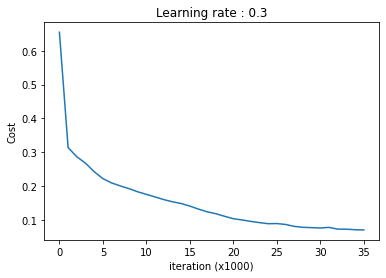

Training Accuracy =49.763033175355446 
Test Accuracy =56.49999999999999 


In [8]:
# cache, d_list = dropout_model(x_train, y_train)
dropout_parameters, dropout_cost = dropout_model(x_train, y_train)
_ = nn.predict(x_train, y_train, dropout_parameters)
_ = nn.predict(x_test, y_test, dropout_parameters, "Test")

In [9]:
cache_dict = np.load('cache.npy', allow_pickle= True)

In [10]:
cache_dict = cache_dict.item()
print(cache_dict.keys())

dict_keys(['Z1', 'D1', 'A1', 'W1', 'b1', 'Z2', 'D2', 'A2', 'W2', 'b2', 'Z3', 'A3', 'W3', 'b3'])
